/Users/jyang872/anaconda3/envs/pyomo/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


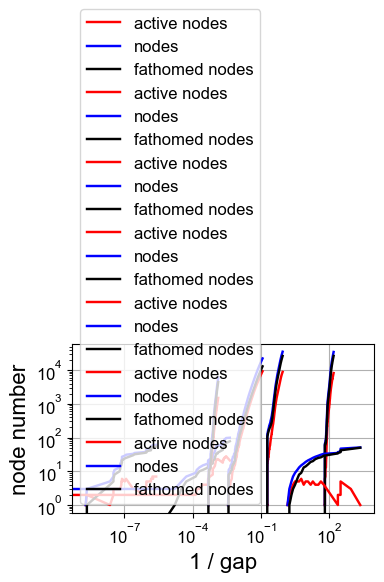

In [ ]:
import dill
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

# File path list
path_list = {
    'FLECCS': 'data/FLECCS.pkl',
    'poutil': 'data/poutil.pkl',
    'ex8_4_4': 'data/ex8_4_4.pkl',
    'crude_selection': 'data/crude_selection.pkl',
    'pooling': 'data/pooling.pkl',
    'process': 'data/process.pkl',
    'tanksize': 'data/tanksize.pkl'
}

# Dropdown widget
dropdown = widgets.Dropdown(
    options=path_list,
    description='Select Case:',
    layout=widgets.Layout(width='50%')
)

# Output area
out = widgets.Output()

# Callback function
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        out.clear_output()
        with out:
            try:
                with open(change['new'], 'rb') as f:
                    data = dill.load(f)
                print(f"Loaded: {change['new']}")
                data.res.plot_bb_n_gap("loglog")
                plt.show()
            except Exception as e:
                print("Error loading or plotting:", e)

# Attach callback
dropdown.observe(on_change)

# Display widgets
display(dropdown, out)
